# コードのテスト
## conf_matrix.py の関数について
- 混同行列作成する

### 作業内容のエクセル（H3-038_作業内容.xlsx）の「conf_matrixの結果確認」シートでもacc正しいか確認してる
- \\Scntrsh08b\gf_10005658\RealWorldInformatics\個人用\横井\TMP_YOKOI\HSC_横井\109.Multitask-Learningによる化合物画像の毒性予測  
H3-038_作業内容.xlsx

In [1]:
import os
gpu_num = "0"
os.environ["CUDA_VISIBLE_DEVICES"] = str(gpu_num)

# モジュールimport
import os, sys
current_dir = os.path.dirname(os.path.abspath("__file__"))
path = os.path.join(current_dir, '../../')
sys.path.append(path)
from dataset import plot_log, prepare_data, util, plot_12task_log
from transformer import get_train_valid_test
from model import define_model, multi_loss, my_callback, my_metric
from predicter import roc_curve, conf_matrix, multi_predict, grad_cam, ensemble_predict

import numpy as np
import keras
import keras.backend as K
import matplotlib.pyplot as plt

sys.path.append(r'/home/tmp10014/jupyterhub/notebook/other/lib_DL/mixup-generator')
from random_eraser import get_random_eraser

plot_log.py: loaded as module file
prepare_data.py: loaded as module file
util.py: loaded as module file
plot_12task_log.py: loaded as module file


Using TensorFlow backend.
/home/tmp10014/.conda/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


get_train_valid_test.py: loaded as module file
define_model.py: loaded as module file
multi_loss.py: loaded as module file
my_callback.py: loaded as module file
my_metric.py: loaded as module file
roc_curve.py: loaded as module file
conf_matrix.py: loaded as module file
multi_predict.py: loaded as module file
grad_cam.py: loaded as module file
ensemble_predict.py: loaded as module file


In [2]:
%%time
train_batch_size=68#17
valid_batch_size=37#6
shape=[100, 100, 3]
out_dir='output_test/100x100'

# ラベル情報などが書いたcsvファイル（tox21_compoundData.csv）
csv_path = r'../../storage/tox21_compoundData.csv'
# IDにファイルのフルパスつける
img_dir = r'../../storage/img/Wash/100x100/'
# 画像ファイルのサフィックス
img_suffix = r'_000.jpg'
# 欠損値を-1に置換したtox21_compoundData.csvのデータフレーム
df = prepare_data.make_label_df(csv_path, img_dir, img_suffix=img_suffix)
# Tox21の画像のパスとラベル(y_train,y_valid,y_test)を取得する
train_files, validation_files, test_files, y_train, y_valid, y_test = prepare_data.make_train_val_test(df)

d_cls = get_train_valid_test.LabeledDataset(shape, train_batch_size, valid_batch_size)
d_cls.load_train_as_image(train_files, y_train)
d_cls.load_validation_as_image(validation_files, y_valid)
d_cls.load_test_as_image(test_files, y_test)

training_set_y.shape: (11764, 12)
validation_set_y.shape: (296, 12)
test_set_y.shape: (647, 12)
CPU times: user 7.6 s, sys: 2.55 s, total: 10.2 s
Wall time: 21.4 s


## conf_matrix.binary_multi_confmx

------------------------------------
out_dir: output_test/100x100/predict/test/confusion_matrix/task0
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       537
           1       0.00      0.00      0.00        73
          -1       0.00      0.00      0.00        37

   micro avg       0.83      0.83      0.83       647
   macro avg       0.28      0.33      0.30       647
weighted avg       0.69      0.83      0.75       647

Confusion matrix, without normalization


/home/tmp10014/.conda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


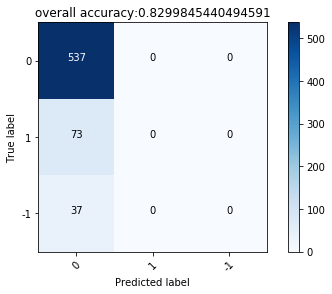

------------------------------------
out_dir: output_test/100x100/predict/test/confusion_matrix/task1
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       574
           1       0.00      0.00      0.00        12
          -1       0.00      0.00      0.00        61

   micro avg       0.89      0.89      0.89       647
   macro avg       0.30      0.33      0.31       647
weighted avg       0.79      0.89      0.83       647

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

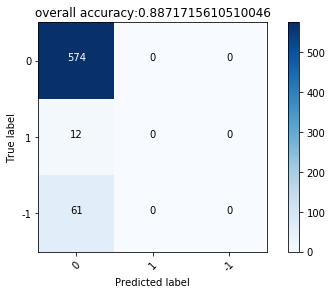

------------------------------------
out_dir: output_test/100x100/predict/test/confusion_matrix/task2
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       574
           1       0.00      0.00      0.00         8
          -1       0.00      0.00      0.00        65

   micro avg       0.89      0.89      0.89       647
   macro avg       0.30      0.33      0.31       647
weighted avg       0.79      0.89      0.83       647

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

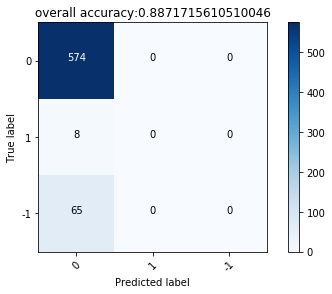

------------------------------------
out_dir: output_test/100x100/predict/test/confusion_matrix/task3
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       489
           1       0.00      0.00      0.00        39
          -1       0.00      0.00      0.00       119

   micro avg       0.76      0.76      0.76       647
   macro avg       0.25      0.33      0.29       647
weighted avg       0.57      0.76      0.65       647

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

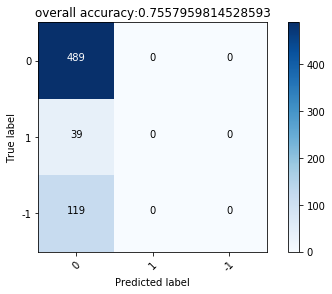

------------------------------------
out_dir: output_test/100x100/predict/test/confusion_matrix/task4
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       465
           1       0.00      0.00      0.00        51
          -1       0.00      0.00      0.00       131

   micro avg       0.72      0.72      0.72       647
   macro avg       0.24      0.33      0.28       647
weighted avg       0.52      0.72      0.60       647

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

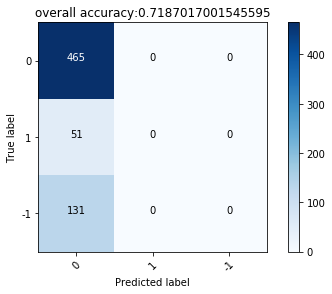

------------------------------------
out_dir: output_test/100x100/predict/test/confusion_matrix/task5
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       580
           1       0.00      0.00      0.00        20
          -1       0.00      0.00      0.00        47

   micro avg       0.90      0.90      0.90       647
   macro avg       0.30      0.33      0.32       647
weighted avg       0.80      0.90      0.85       647

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

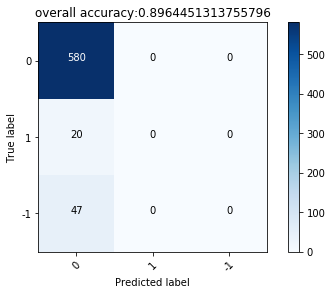

------------------------------------
out_dir: output_test/100x100/predict/test/confusion_matrix/task6
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       574
           1       0.00      0.00      0.00        31
          -1       0.00      0.00      0.00        42

   micro avg       0.89      0.89      0.89       647
   macro avg       0.30      0.33      0.31       647
weighted avg       0.79      0.89      0.83       647

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

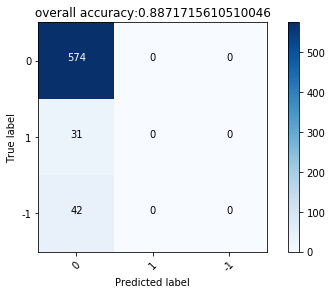

------------------------------------
out_dir: output_test/100x100/predict/test/confusion_matrix/task7
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       462
           1       0.00      0.00      0.00        93
          -1       0.00      0.00      0.00        92

   micro avg       0.71      0.71      0.71       647
   macro avg       0.24      0.33      0.28       647
weighted avg       0.51      0.71      0.59       647

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

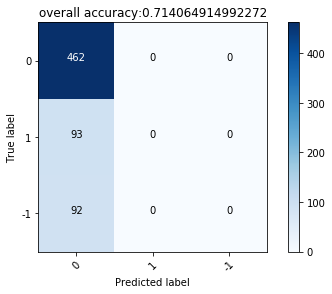

------------------------------------
out_dir: output_test/100x100/predict/test/confusion_matrix/task8
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       584
           1       0.00      0.00      0.00        38
          -1       0.00      0.00      0.00        25

   micro avg       0.90      0.90      0.90       647
   macro avg       0.30      0.33      0.32       647
weighted avg       0.81      0.90      0.86       647

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

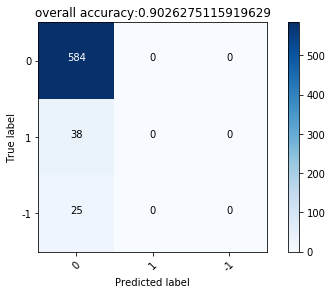

------------------------------------
out_dir: output_test/100x100/predict/test/confusion_matrix/task9
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       588
           1       0.00      0.00      0.00        22
          -1       0.00      0.00      0.00        37

   micro avg       0.91      0.91      0.91       647
   macro avg       0.30      0.33      0.32       647
weighted avg       0.83      0.91      0.87       647

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

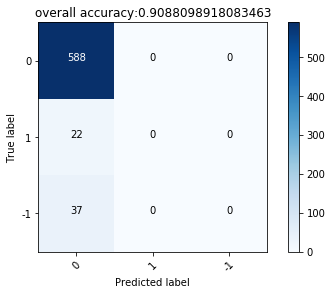

------------------------------------
out_dir: output_test/100x100/predict/test/confusion_matrix/task10
              precision    recall  f1-score   support

           0       0.75      1.00      0.85       483
           1       0.00      0.00      0.00        60
          -1       0.00      0.00      0.00       104

   micro avg       0.75      0.75      0.75       647
   macro avg       0.25      0.33      0.28       647
weighted avg       0.56      0.75      0.64       647

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

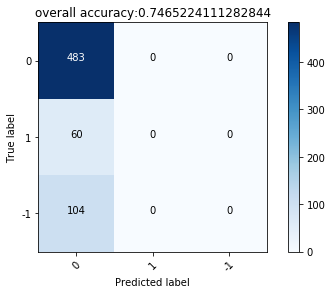

------------------------------------
out_dir: output_test/100x100/predict/test/confusion_matrix/task11
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       575
           1       0.00      0.00      0.00        41
          -1       0.00      0.00      0.00        31

   micro avg       0.89      0.89      0.89       647
   macro avg       0.30      0.33      0.31       647
weighted avg       0.79      0.89      0.84       647

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

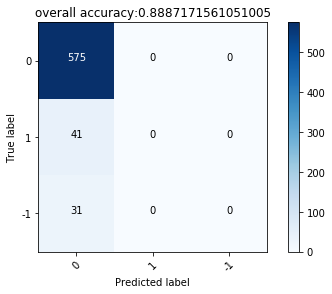

CPU times: user 30.1 s, sys: 8.06 s, total: 38.2 s
Wall time: 32.3 s


<Figure size 432x288 with 0 Axes>

In [3]:
%%time
# -------- 推論 --------
model = keras.models.load_model(os.path.join(out_dir, 'test_model.h5'), compile=False)
# 推論結果出力先
out_predict_dir = os.path.join(out_dir, 'predict/test')
# 出力層のニューラルネットワークに分岐がない場合のpredict
y_test_list, y_pred_list = multi_predict.no_branch_set_predict(model, d_cls.X_test, d_cls.y_test, out_predict_dir)

# -------- 混同行列 --------
# 分類クラス 0(negative), 1(positive), -1(ラベル欠損)
classes = [0,1,-1]

# タスクごとのpredictのスコア(y_pred)と正解ラベル(y_true)から混同行列をファイル出力
conf_matrix.binary_multi_confmx(classes, y_test_list, y_pred_list, out_predict_dir)

------------------------------------
out_dir: output_test/100x100/predict/validation/confusion_matrix/task0
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       241
           1       0.00      0.00      0.00        31
          -1       0.00      0.00      0.00        24

   micro avg       0.81      0.81      0.81       296
   macro avg       0.27      0.33      0.30       296
weighted avg       0.66      0.81      0.73       296

Confusion matrix, without normalization


/home/tmp10014/.conda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


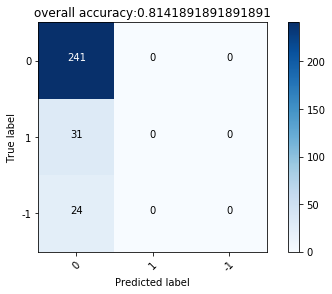

------------------------------------
out_dir: output_test/100x100/predict/validation/confusion_matrix/task1
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       289
           1       0.00      0.00      0.00         3
          -1       0.00      0.00      0.00         4

   micro avg       0.98      0.98      0.98       296
   macro avg       0.33      0.33      0.33       296
weighted avg       0.95      0.98      0.96       296

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

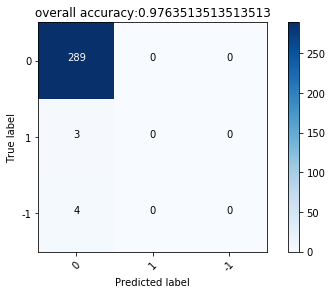

------------------------------------
out_dir: output_test/100x100/predict/validation/confusion_matrix/task2
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       249
           1       0.00      0.00      0.00         4
          -1       0.00      0.00      0.00        43

   micro avg       0.84      0.84      0.84       296
   macro avg       0.28      0.33      0.30       296
weighted avg       0.71      0.84      0.77       296

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

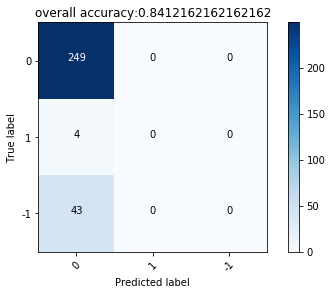

------------------------------------
out_dir: output_test/100x100/predict/validation/confusion_matrix/task3
              precision    recall  f1-score   support

           0       0.66      1.00      0.80       196
           1       0.00      0.00      0.00        18
          -1       0.00      0.00      0.00        82

   micro avg       0.66      0.66      0.66       296
   macro avg       0.22      0.33      0.27       296
weighted avg       0.44      0.66      0.53       296

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

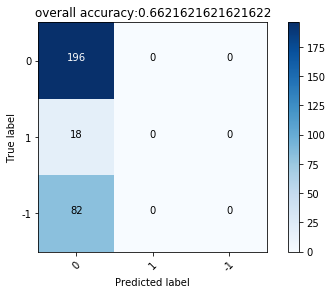

------------------------------------
out_dir: output_test/100x100/predict/validation/confusion_matrix/task4
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       238
           1       0.00      0.00      0.00        27
          -1       0.00      0.00      0.00        31

   micro avg       0.80      0.80      0.80       296
   macro avg       0.27      0.33      0.30       296
weighted avg       0.65      0.80      0.72       296

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

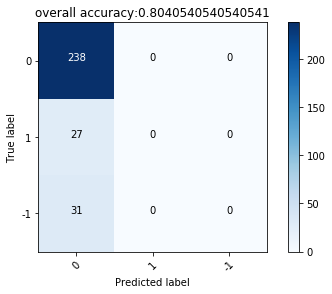

------------------------------------
out_dir: output_test/100x100/predict/validation/confusion_matrix/task5
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       277
           1       0.00      0.00      0.00        10
          -1       0.00      0.00      0.00         9

   micro avg       0.94      0.94      0.94       296
   macro avg       0.31      0.33      0.32       296
weighted avg       0.88      0.94      0.90       296

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

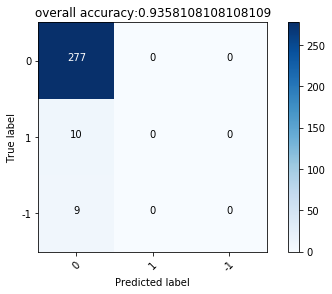

------------------------------------
out_dir: output_test/100x100/predict/validation/confusion_matrix/task6
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       252
           1       0.00      0.00      0.00        15
          -1       0.00      0.00      0.00        29

   micro avg       0.85      0.85      0.85       296
   macro avg       0.28      0.33      0.31       296
weighted avg       0.72      0.85      0.78       296

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

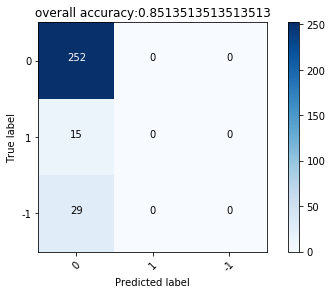

------------------------------------
out_dir: output_test/100x100/predict/validation/confusion_matrix/task7
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       186
           1       0.00      0.00      0.00        48
          -1       0.00      0.00      0.00        62

   micro avg       0.63      0.63      0.63       296
   macro avg       0.21      0.33      0.26       296
weighted avg       0.39      0.63      0.48       296

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

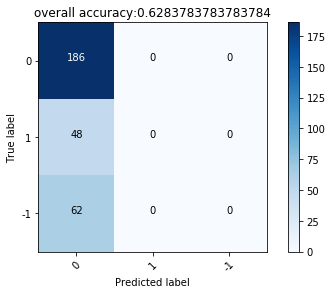

------------------------------------
out_dir: output_test/100x100/predict/validation/confusion_matrix/task8
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       247
           1       0.00      0.00      0.00        25
          -1       0.00      0.00      0.00        24

   micro avg       0.83      0.83      0.83       296
   macro avg       0.28      0.33      0.30       296
weighted avg       0.70      0.83      0.76       296

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

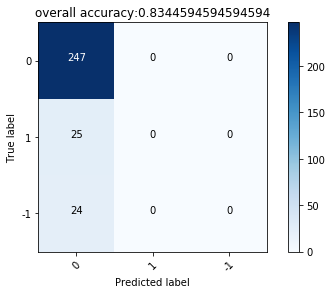

------------------------------------
out_dir: output_test/100x100/predict/validation/confusion_matrix/task9
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       257
           1       0.00      0.00      0.00        10
          -1       0.00      0.00      0.00        29

   micro avg       0.87      0.87      0.87       296
   macro avg       0.29      0.33      0.31       296
weighted avg       0.75      0.87      0.81       296

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

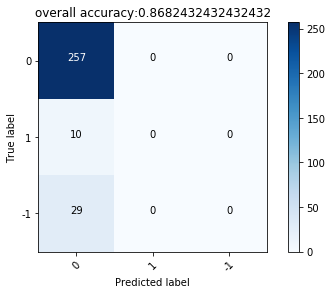

------------------------------------
out_dir: output_test/100x100/predict/validation/confusion_matrix/task10
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       200
           1       0.00      0.00      0.00        38
          -1       0.00      0.00      0.00        58

   micro avg       0.68      0.68      0.68       296
   macro avg       0.23      0.33      0.27       296
weighted avg       0.46      0.68      0.54       296

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

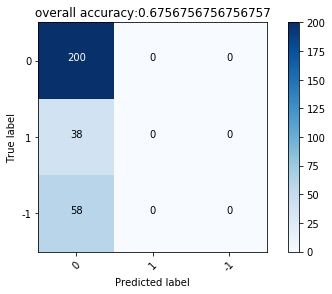

------------------------------------
out_dir: output_test/100x100/predict/validation/confusion_matrix/task11
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       241
           1       0.00      0.00      0.00        28
          -1       0.00      0.00      0.00        27

   micro avg       0.81      0.81      0.81       296
   macro avg       0.27      0.33      0.30       296
weighted avg       0.66      0.81      0.73       296

Confusion matrix, without normalization


<Figure size 432x288 with 0 Axes>

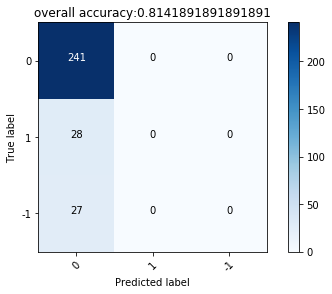

CPU times: user 11.9 s, sys: 4.69 s, total: 16.6 s
Wall time: 11.8 s


<Figure size 432x288 with 0 Axes>

In [4]:
%%time
# -------- 推論 --------
model = keras.models.load_model(os.path.join(out_dir, 'test_model_12branch.h5'), compile=False)
# 推論結果出力先
out_predict_dir = os.path.join(out_dir, 'predict/validation')
# 出力層のニューラルネットワークに分岐がない場合のpredict
y_valid_list, y_pred_list = multi_predict.branch_set_predict(model, d_cls.X_valid, d_cls.y_valid, out_predict_dir)

# -------- 混同行列 --------
# 分類クラス 0(negative), 1(positive), -1(ラベル欠損)
classes = [0,1,-1]

# タスクごとのpredictのスコア(y_pred)と正解ラベル(y_true)から混同行列をファイル出力
conf_matrix.binary_multi_confmx(classes, y_valid_list, y_pred_list, out_predict_dir)